In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neattext.functions as nfx

In [2]:
df = pd.read_csv("E:/python/Emotion Detection/test.csv")
df1 = pd.read_csv("E:/python/Emotion Detection/train.csv")
df2 = pd.read_csv("E:/python/Emotion Detection/val.csv")

In [3]:
df.head()

,Emotion,Text
0,sadness,im feeling rather rotten so im not very ambiti...
1,sadness,i never make her separate from me because i do...
2,joy,i left with my bouquet of red and yellow tulip...
3,sadness,i was feeling a little vain when i did this one
4,fear,i cant walk into a shop anywhere where i do no...


In [4]:
df.shape

(1999, 2)

In [5]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [6]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [7]:
df['Emotion'].value_counts()

joy         695
sadness     580
anger       275
fear        224
love        159
surprise     66
Name: Emotion, dtype: int64

<AxesSubplot:>

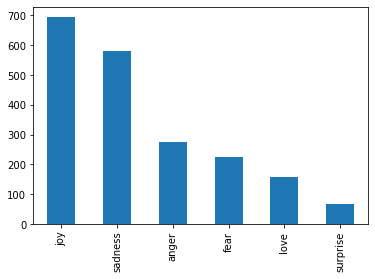

In [8]:
df['Emotion'].value_counts().plot(kind='bar')

C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Emotion', ylabel='count'>

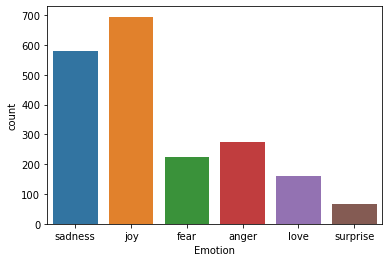

In [9]:
sns.countplot(df['Emotion'])

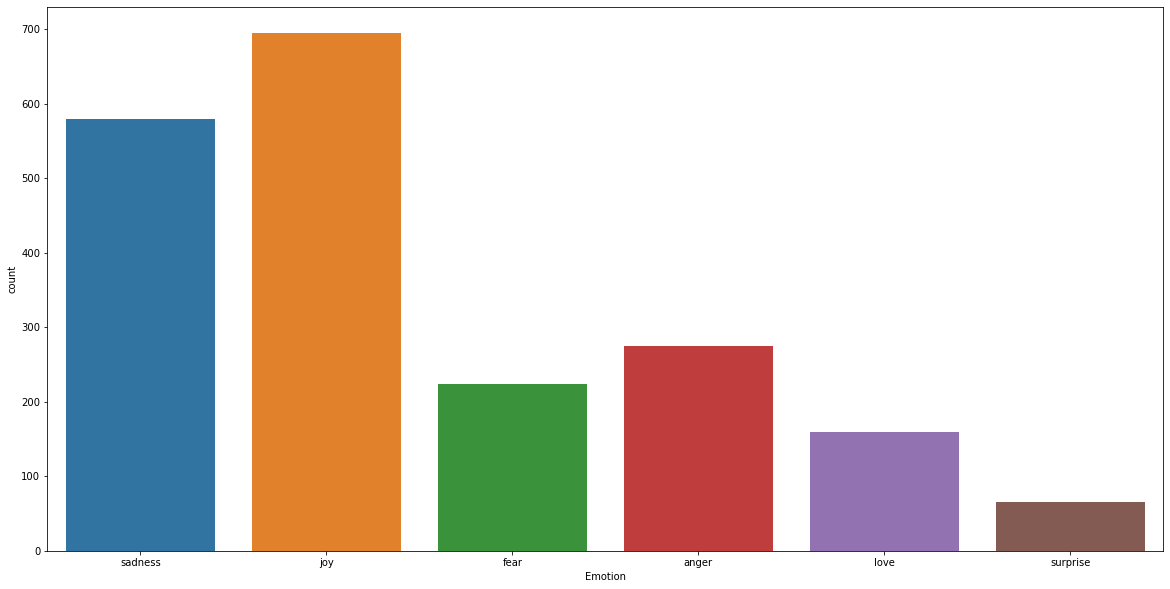

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x='Emotion',data=df)
plt.show()

In [11]:
from textblob import TextBlob

In [12]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment =blob.sentiment.polarity
    if sentiment > 0:
        result = 'Positive'
    elif sentiment < 0:
        result = 'Negative'
    else :
        result = 'Neutral'
    return result

In [13]:
get_sentiment("he is good")

'Positive'

In [14]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [15]:
df.head()

,Emotion,Text,Sentiment
0,sadness,im feeling rather rotten so im not very ambiti...,Positive
1,sadness,i never make her separate from me because i do...,Neutral
2,joy,i left with my bouquet of red and yellow tulip...,Positive
3,sadness,i was feeling a little vain when i did this one,Negative
4,fear,i cant walk into a shop anywhere where i do no...,Negative


In [16]:
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     133
          Neutral       63
          Positive      79
fear      Negative     112
          Neutral       58
          Positive      54
joy       Negative      64
          Neutral      106
          Positive     525
love      Negative      34
          Neutral       28
          Positive      97
sadness   Negative     288
          Neutral      147
          Positive     145
surprise  Negative      29
          Neutral        7
          Positive      30
dtype: int64

<AxesSubplot:xlabel='Emotion,Sentiment'>

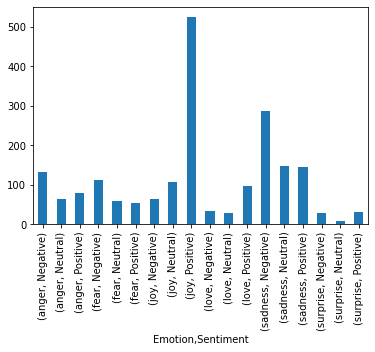

In [17]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

In [18]:
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(*, x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x00000213359E1310>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


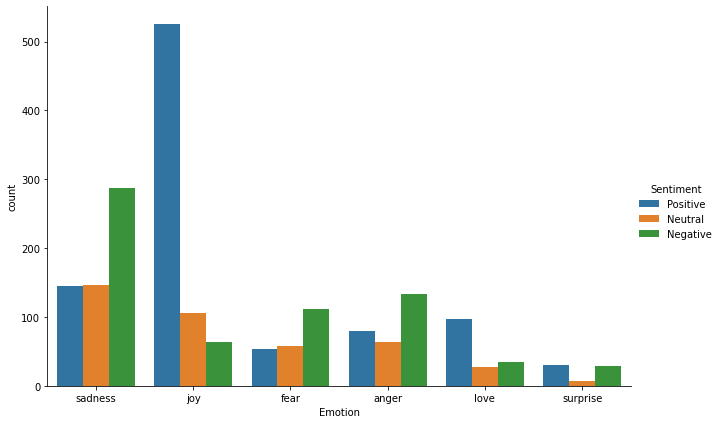

In [19]:
sns.factorplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


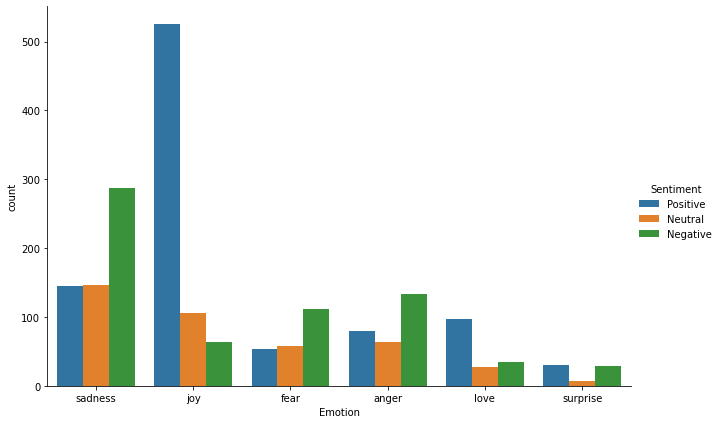

In [20]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',size=6,aspect=1.5)

In [21]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [22]:
df['Clean_Text']=df['Text'].apply(nfx.remove_stopwords)

In [23]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_userhandles)

In [24]:
df['Clean_Text']=df['Clean_Text'].apply(nfx.remove_punctuations)

In [25]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,im feeling rather rotten so im not very ambiti...,im feeling rotten im ambitious right
1,i never make her separate from me because i do...,separate want feel like ashamed
2,i left with my bouquet of red and yellow tulip...,left bouquet red yellow tulips arm feeling sli...
3,i was feeling a little vain when i did this one,feeling little vain
4,i cant walk into a shop anywhere where i do no...,cant walk shop feel uncomfortable
...,...,...
1994,i just keep feeling like someone is being unki...,feeling like unkind wrong think people close
1995,im feeling a little cranky negative after this...,im feeling little cranky negative doctors appo...
1996,i feel that i am useful to my people and that ...,feel useful people gives great feeling achieve...
1997,im feeling more comfortable with derby i feel ...,im feeling comfortable derby feel start step s...


In [26]:
from collections import Counter

In [27]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [28]:
emotion_list=df["Emotion"].unique().tolist()

In [29]:
emotion_list

['sadness', 'joy', 'fear', 'anger', 'love', 'surprise']

In [30]:
joy_list=df[df['Emotion']=="joy"]['Clean_Text'].tolist()

In [31]:
joy_docx=''.join(joy_list)

In [32]:
joy_docx

'left bouquet red yellow tulips arm feeling slightly optimistic arrivedexplain clung relationship boy ways immature uncommitted despite excitement feeling getting accepted masters program university virginialike breathless feeling reader eager happenfeel extremely comfortable group people dont need hidefeel little mellow todayfeel like reds purples rich kind perfectfeel like ive gotten know comments emails im appreciative glad little spacesurvey posts years feel pleased vague snippets feel little bits capture like like dublin st centuryfeel virtuous eat veggies dipped hummusfeel honoured included magzine prioritises health clean living highly im curious read magazines concerned health clean lifestyles green parentim feeling peaceful weddingtalking coach claudia barcomb coach ali boe long time feel welcomed unionfeel reassured dealing diet right way goodim happy mood today feel delighted havent different today normally wonderfulknow feel friendly affectionfeel like productive weekend ca

In [33]:
keyword_joy=extract_keywords(joy_docx)

In [34]:
keyword_joy

{'feel': 209,
 'feeling': 135,
 'like': 113,
 'im': 42,
 'time': 29,
 'people': 28,
 'life': 21,
 'pretty': 21,
 'little': 18,
 'way': 18,
 'know': 17,
 'today': 17,
 'happy': 16,
 'day': 16,
 'things': 16,
 'want': 15,
 'lot': 15,
 'going': 15,
 'sure': 14,
 'makes': 13,
 'ive': 12,
 'href': 12,
 'http': 12,
 'feelings': 12,
 'work': 12,
 'think': 12,
 'getting': 11,
 'dont': 11,
 'need': 11,
 'right': 11,
 'able': 11,
 'love': 11,
 'feels': 11,
 'days': 10,
 'good': 10,
 'valued': 10,
 'determined': 10,
 'proud': 10,
 'got': 10,
 'accepted': 9,
 'comfortable': 9,
 'virtuous': 9,
 'honoured': 9,
 'house': 9,
 'person': 9,
 'wonderful': 9,
 'thrilled': 9,
 'confident': 9,
 'perfect': 9,
 'acceptable': 9}

In [35]:
def plot_most_common_words(mydict,emotion_name):
    df_01 = pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {} most common keywords".format(emotion_name))
    sns.barplot(x="token",y="count",data=df_01)
    plt.xticks(rotation=45)
    plt.show()

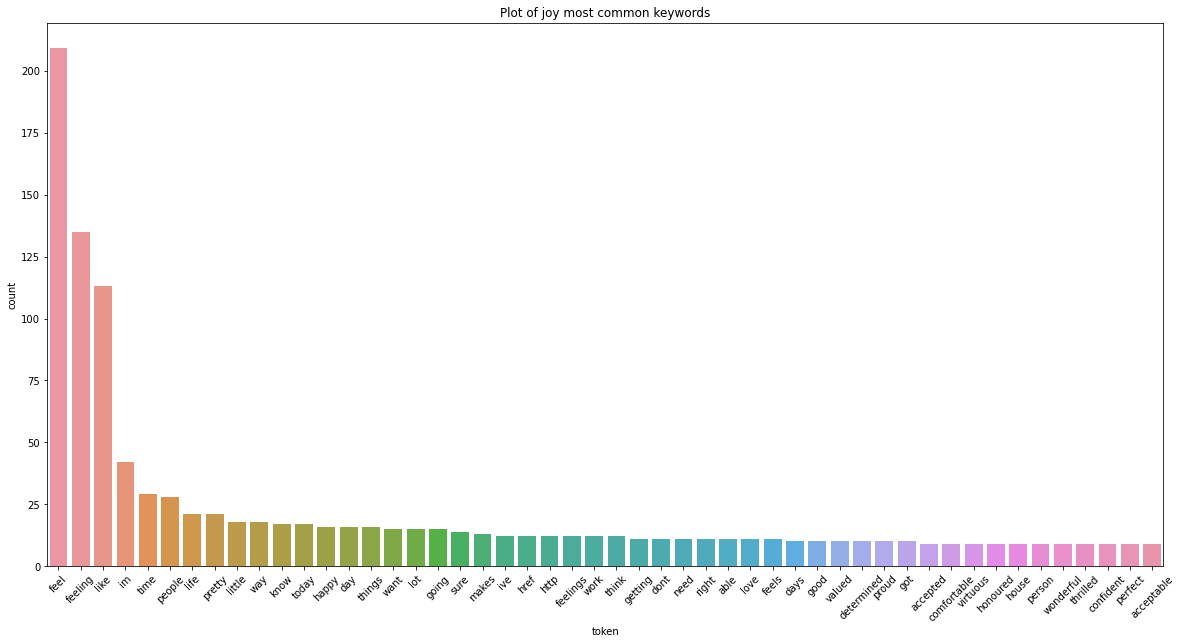

In [36]:
plot_most_common_words(keyword_joy,"joy")

In [37]:
surprise_list=df[df['Emotion']=='surprise']['Clean_Text'].tolist()
surprise_docx=' '.join(surprise_list)
keyword_surprise=extract_keywords(surprise_docx)

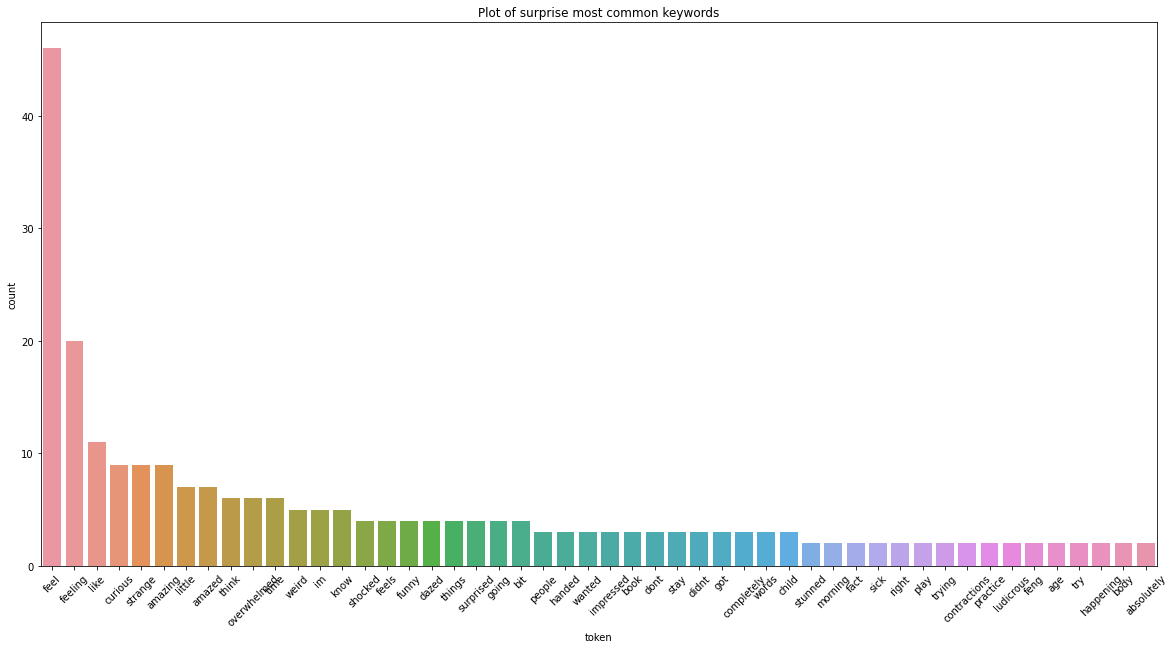

In [38]:
plot_most_common_words(keyword_surprise,"surprise")

In [39]:
from wordcloud import WordCloud

In [40]:
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation="bilinear")
    plt.axis('off')
    plt.show()

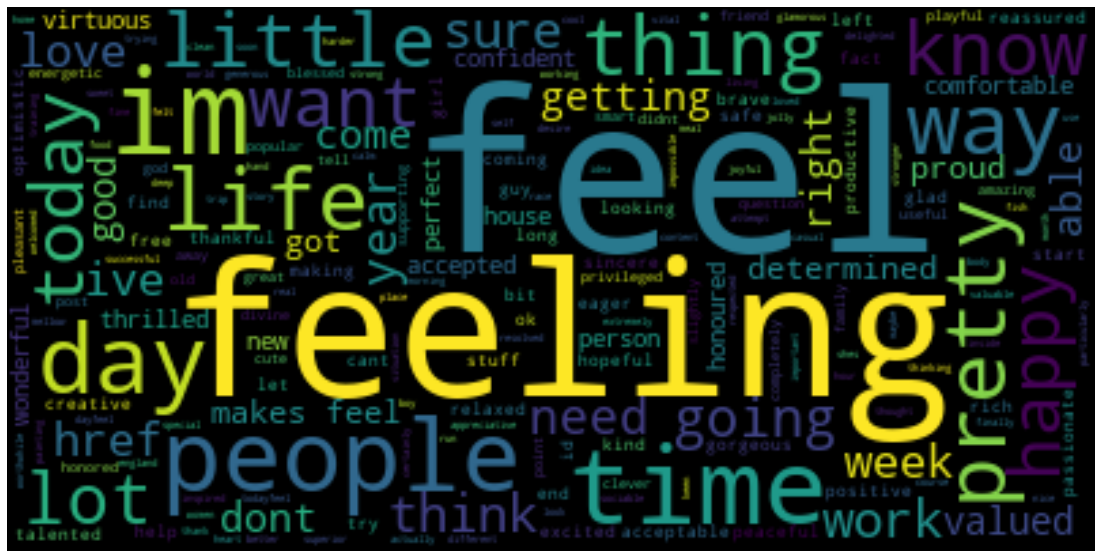

In [41]:
plot_wordcloud(joy_docx)

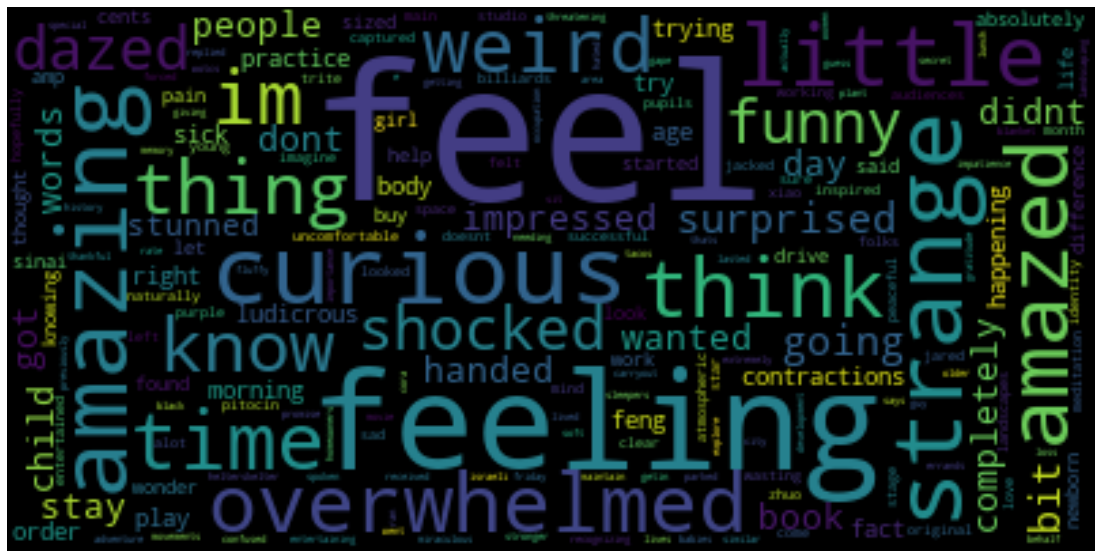

In [42]:
plot_wordcloud(surprise_docx)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [46]:
Xfeatures

0                    im feeling rotten im ambitious right
1                         separate want feel like ashamed
2       left bouquet red yellow tulips arm feeling sli...
3                                     feeling little vain
4                       cant walk shop feel uncomfortable
                              ...                        
1994         feeling like unkind wrong think people close
1995    im feeling little cranky negative doctors appo...
1996    feel useful people gives great feeling achieve...
1997    im feeling comfortable derby feel start step s...
1998    feel weird meet w people text like dont talk f...
Name: Clean_Text, Length: 1999, dtype: object

In [47]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [48]:
cv.get_feature_names()

['aaaah',
 'abandoned',
 'abandoning',
 'abandonment',
 'abba',
 'abilities',
 'ability',
 'abit',
 'able',
 'ablo',
 'abou',
 'absence',
 'absoloutely',
 'absolutely',
 'abuse',
 'abused',
 'abyss',
 'accept',
 'acceptable',
 'acceptance',
 'accepted',
 'accepting',
 'access',
 'accommodate',
 'accomplished',
 'accomplishment',
 'according',
 'accounted',
 'accounts',
 'accusation',
 'accustomed',
 'ache',
 'aches',
 'achieve',
 'achieved',
 'achievement',
 'aching',
 'acknowledge',
 'acquaintances',
 'acquired',
 'act',
 'acted',
 'action',
 'actions',
 'active',
 'actively',
 'activity',
 'actor',
 'actors',
 'actual',
 'actually',
 'ad',
 'add',
 'added',
 'adding',
 'address',
 'admire',
 'admired',
 'admit',
 'adopt',
 'adopted',
 'adore',
 'adoring',
 'adrenaline',
 'adult',
 'adults',
 'advance',
 'advanced',
 'advantage',
 'adventure',
 'adventurous',
 'advice',
 'advil',
 'aesthetic',
 'aesthetics',
 'affair',
 'affection',
 'affectionate',
 'affirmed',
 'afraid',
 'african',

In [49]:
# X.toarray()

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [51]:
nv_model= MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [52]:
nv_model.score(X_test,y_test)

0.6316666666666667

In [53]:
y_pred_for_nv= nv_model.predict(X_test)

In [54]:
y_pred_for_nv

array(['anger', 'joy', 'joy', 'sadness', 'sadness', 'sadness', 'fear',
       'sadness', 'sadness', 'anger', 'joy', 'joy', 'sadness', 'sadness',
       'sadness', 'joy', 'joy', 'sadness', 'joy', 'joy', 'joy', 'anger',
       'sadness', 'joy', 'sadness', 'joy', 'sadness', 'joy', 'sadness',
       'sadness', 'sadness', 'joy', 'sadness', 'sadness', 'anger', 'joy',
       'joy', 'joy', 'sadness', 'joy', 'sadness', 'love', 'anger', 'joy',
       'sadness', 'sadness', 'sadness', 'sadness', 'sadness', 'joy',
       'joy', 'joy', 'sadness', 'sadness', 'love', 'sadness', 'fear',
       'joy', 'joy', 'sadness', 'sadness', 'sadness', 'joy', 'sadness',
       'anger', 'joy', 'sadness', 'sadness', 'sadness', 'fear', 'joy',
       'fear', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy', 'joy',
       'joy', 'anger', 'joy', 'joy', 'joy', 'sadness', 'anger', 'joy',
       'joy', 'sadness', 'joy', 'joy', 'joy', 'joy', 'joy', 'sadness',
       'love', 'sadness', 'joy', 'joy', 'joy', 'joy', 'sadness',
  

In [55]:
sample_text=['I love Divya so much']

In [56]:
vect=cv.transform(sample_text).toarray()

In [57]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [58]:
nv_model.predict_proba(vect)

array([[0.1628018 , 0.0274947 , 0.43419571, 0.08322161, 0.28290556,
        0.00938061]])

In [59]:
nv_model.classes_

array(['anger', 'fear', 'joy', 'love', 'sadness', 'surprise'], dtype='<U8')

In [60]:
np.max(nv_model.predict_proba(vect))

0.4341957127005569

In [61]:
def predict_emotion(sample_text,model):
    myvect=cv.transform(sample_text).toarray()
    prediction=model.predict(myvect)
    pred_proba=model.predict_proba(myvect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print("Prediction:{},Prediction score:{}".format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [62]:
predict_emotion(sample_text,nv_model)

Prediction:joy,Prediction score:0.4341957127005569


{'anger': 0.1628017983579923,
 'fear': 0.027494697681984353,
 'joy': 0.4341957127005569,
 'love': 0.0832216130285918,
 'sadness': 0.2829055633579019,
 'surprise': 0.00938061487297297}

In [63]:
predict_emotion(["He hates divya's some habets"],nv_model)

Prediction:joy,Prediction score:0.44971543620660964


{'anger': 0.12646569212144235,
 'fear': 0.10679046567949858,
 'joy': 0.44971543620660964,
 'love': 0.08080898827036051,
 'sadness': 0.19978474794569767,
 'surprise': 0.0364346697763914}

In [64]:
print(classification_report(y_test,y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.65      0.36      0.46        73
        fear       0.61      0.28      0.39        67
         joy       0.62      0.83      0.71       207
        love       0.80      0.18      0.29        45
     sadness       0.63      0.82      0.72       188
    surprise       0.00      0.00      0.00        20

    accuracy                           0.63       600
   macro avg       0.55      0.41      0.43       600
weighted avg       0.62      0.63      0.59       600



C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Administrator\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [65]:
confusion_matrix(y_test,y_pred_for_nv)

array([[ 26,   2,  22,   0,  23,   0],
       [  2,  19,  20,   0,  26,   0],
       [  7,   2, 171,   2,  25,   0],
       [  0,   0,  23,   8,  14,   0],
       [  5,   3,  25,   0, 155,   0],
       [  0,   5,  13,   0,   2,   0]], dtype=int64)

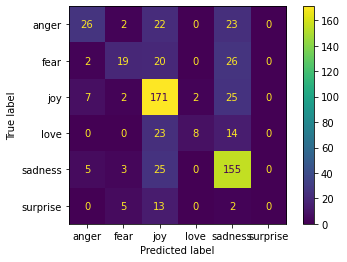

In [66]:
plot_confusion_matrix(nv_model,X_test,y_test)

In [67]:
import joblib

In [68]:
model_file=open("test.pkl","wb")
joblib.dump(nv_model,model_file)
model_file.close()

In [69]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [70]:
lr_model.score(X_test,y_test)

0.7033333333333334

In [71]:
predict_emotion(sample_text,lr_model)

Prediction:anger,Prediction score:0.3285386715584315


{'anger': 0.3285386715584315,
 'fear': 0.05427427958142504,
 'joy': 0.2789573978619891,
 'love': 0.1409224886102782,
 'sadness': 0.17385264252945562,
 'surprise': 0.023454519858420526}

In [72]:
import eli5

In [73]:
eli5.show_weights(lr_model,top=20)

In [74]:
class_names=ylabels.unique().tolist()

In [75]:
feature_names=cv.get_feature_names()

In [76]:
eli5.show_weights(lr_model,feature_names=feature_names,target_names=class_names)